In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
train = pd.read_json('train.json')

In [7]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [8]:
train.dtypes

cuisine        object
id              int64
ingredients    object
dtype: object

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
# what are most common ingredients? think of them as stop words;
# remove stop ingredients

In [37]:
superList = [item for sublist in train.ingredients for item in sublist]

In [46]:
from collections import Counter
Counter(superList).most_common(40)

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113),
 ('green onions', 3078),
 ('tomatoes', 3058),
 ('large eggs', 2948),
 ('carrots', 2814),
 ('unsalted butter', 2782),
 ('extra-virgin olive oil', 2747),
 ('ground cumin', 2747),
 ('black pepper', 2627),
 ('milk', 2263),
 ('chili powder', 2036),
 ('oil', 1970),
 ('red bell pepper', 1939),
 ('purple onion', 1896),
 ('scallions', 1891),
 ('grated parmesan cheese', 1886),
 ('sesame oil', 1773),
 ('corn starch', 1757),
 ('ginger', 1755),
 ('baking powder', 1738),
 ('jalapeno chilies', 1730),
 ('dried oregano', 1707),
 ('chopped cilantro fresh', 1698),
 ('fresh lemon juice', 1679),
 ('diced tomatoes', 1624),
 ('fresh parsley', 1604)]

In [44]:
labels, values = zip(*Counter(superList).most_common(50))

<Container object of 50 artists>

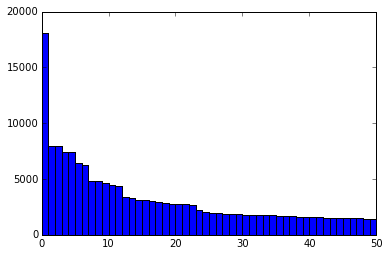

In [45]:
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels)

# visualize #

In [ ]:
# number of each cuisine type

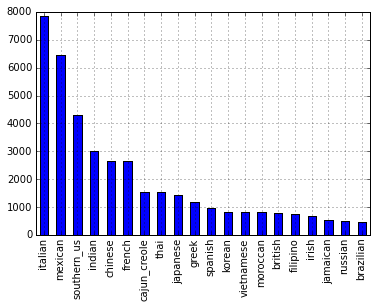

In [12]:
train.cuisine.value_counts().plot(kind = 'bar')

In [ ]:
# how many for each category of cuisine; mean # of ingredients; 
# any distinct/unique ingredients?

# cleaning 

In [9]:
from nltk.stem import WordNetLemmatizer
import re

In [25]:
data_train['ingredients_clean_string'] = [' , '.join(z).strip() for z in data_train['ingredients']]  
data_train['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in data_train['ingredients']]       

In [26]:
data_train.head()

,cuisine,id,ingredients,ingredients_clean_string,ingredients_string
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce , black olives , grape tomatoe...",romaine lettuce black olives grape tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour , ground pepper , salt , tomatoes ...",plain flour ground pepper salt tomato ground b...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs , pepper , salt , mayonaise , cooking oil...",egg pepper salt mayonaise cooking oil green ch...
3,indian,22213,"[water, vegetable oil, wheat, salt]","water , vegetable oil , wheat , salt",water vegetable oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper , shallots , cornflour , cayenne ...",black pepper shallot cornflour cayenne pepper ...


In [18]:
data_train.ingredients_string[2]

'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers'

In [33]:
data_train.ingredients_string[0:10]

0    romaine lettuce black olives grape tomatoes ga...
1    plain flour ground pepper salt tomato ground b...
2    egg pepper salt mayonaise cooking oil green ch...
3                       water vegetable oil wheat salt
4    black pepper shallot cornflour cayenne pepper ...
5    plain flour sugar butter egg fresh ginger root...
6    olive oil salt medium shrimp pepper garlic cho...
7    sugar pistachio nuts white almond bark flour v...
8    olive oil purple onion fresh pineapple pork po...
9    chopped tomatoes fresh basil garlic extra virg...
Name: ingredients_string, dtype: object

In [20]:
WordNetLemmatizer().lemmatize("loving")

'loving'

In [28]:
WordNetLemmatizer().lemmatize("eggs")

'egg'

In [30]:
words = [' '.join(item) for item in data_train.ingredients]

In [31]:
words[0:10]

['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles',
 'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil',
 'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers',
 'water vegetable oil wheat salt',
 'black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf',
 'plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder',
 'olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage',
 'sugar pistachio nuts white almond bark flour vanilla e

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
# Construct the Bag of Words
vec = CountVectorizer(max_features=2000)
bag_of_words = vec.fit(words).transform(words).toarray()

In [36]:
bag_of_words[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)